In [10]:
import os
import numpy as np
import matplotlib.image as mpimg
from utils import*

root_dir = "/Users/aurelien/ML/ML_course-main/projects/project2/data/training/basic/"
image_dir = root_dir + "images/"
gt_dir = root_dir + "groundtruth/"
image_files = os.listdir(image_dir)
gt_files = os.listdir(gt_dir)

# Load one sample image and its mask for demonstration
sample_img = load_image(os.path.join(image_dir, image_files[0]))  # shape (H, W, 3)
sample_gt = load_image(os.path.join(gt_dir, gt_files[0]))         # shape (H, W)


In [11]:
#################################
# Setup and Dataset Paths
#################################

image_dir = os.path.join(root_dir, "images")
gt_dir = os.path.join(root_dir, "groundtruth")

image_files = sorted(os.listdir(image_dir))
gt_files = sorted(os.listdir(gt_dir))

augmented_dir = os.path.join(root_dir, "augmented")
augmented_img_dir = os.path.join(augmented_dir, "images")
augmented_gt_dir = os.path.join(augmented_dir, "groundtruth")

os.makedirs(augmented_img_dir, exist_ok=True)
os.makedirs(augmented_gt_dir, exist_ok=True)

num_augmentations = 5  # For each image, generate 5 new augmented images

#################################
# Augmentation Process
#################################

for i, img_file in enumerate(image_files):
    img_path = os.path.join(image_dir, img_file)
    gt_path = os.path.join(gt_dir, gt_files[i])
    
    image = load_image(img_path)
    mask = load_image(gt_path)
    
    # Save original to augmented set as well
    save_image(image, os.path.join(augmented_img_dir, img_file))
    save_image(mask, os.path.join(augmented_gt_dir, gt_files[i]))
    
    # Generate multiple new augmented images
    for n in range(num_augmentations):
        aug_img, aug_mask = random_augmentation(image, mask)
        
        base_name = os.path.splitext(img_file)[0] + f"_aug{n}.png"
        mask_base_name = os.path.splitext(gt_files[i])[0] + f"_aug{n}.png"
        
        save_image(aug_img, os.path.join(augmented_img_dir, base_name))
        save_image(aug_mask, os.path.join(augmented_gt_dir, mask_base_name))

print("Data augmentation with rotation, translation, zoom, and optional flip completed!")



Data augmentation with rotation, translation, zoom, and optional flip completed!


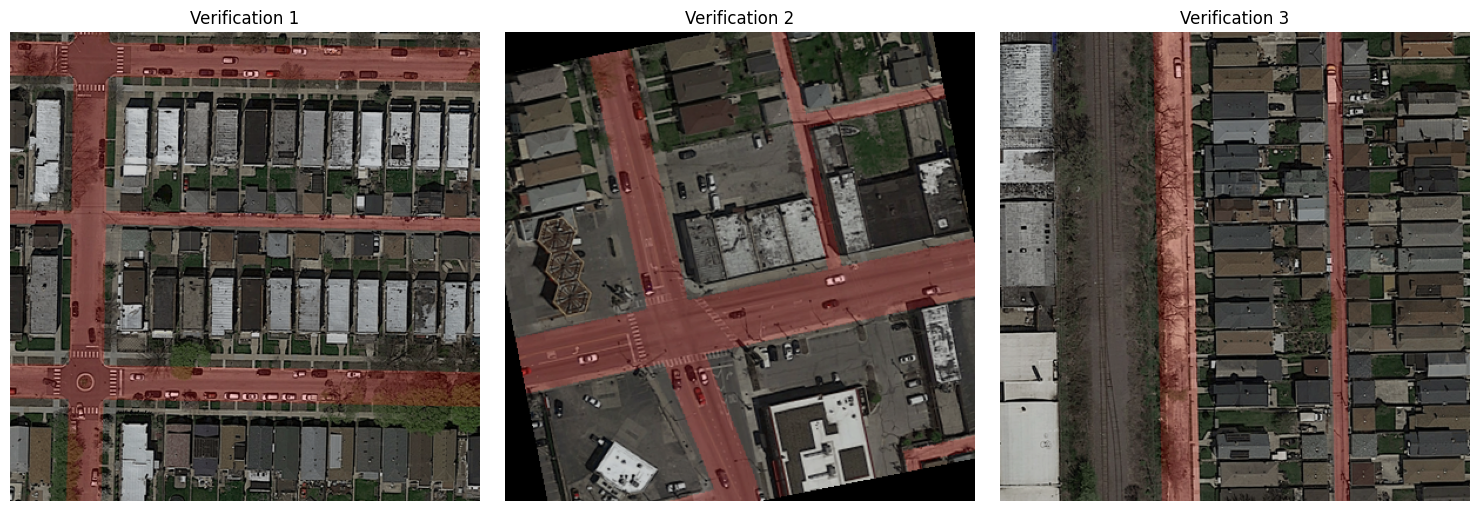

In [12]:
#################################
# Perform Verification
#################################

# After augmentation, let's verify randomly 3 images
random_verification(augmented_img_dir, augmented_gt_dir, n=3)

In [13]:
import os
from PIL import Image

# Assuming these directories were used for augmentation
augmented_dir = os.path.join(root_dir, "augmented")
augmented_img_dir = os.path.join(augmented_dir, "images")
augmented_gt_dir = os.path.join(augmented_dir, "groundtruth")

# List augmented images and masks
aug_img_files = [f for f in os.listdir(augmented_img_dir) if f.lower().endswith((".png", ".jpg", ".jpeg"))]
aug_mask_files = [f for f in os.listdir(augmented_gt_dir) if f.lower().endswith((".png", ".jpg", ".jpeg"))]

# Print counts
print("Number of augmented images:", len(aug_img_files))
print("Number of augmented masks:", len(aug_mask_files))

# Compute unique dimensions for augmented images
aug_dimensions = []
for f in aug_img_files:
    img_path = os.path.join(augmented_img_dir, f)
    with Image.open(img_path) as img:
        aug_dimensions.append(img.size)  # (width, height)

unique_aug_dimensions = set(aug_dimensions)

print("Dimensions in augmented dataset:", unique_aug_dimensions)

Number of augmented images: 600
Number of augmented masks: 600
Dimensions in augmented dataset: {(400, 400)}


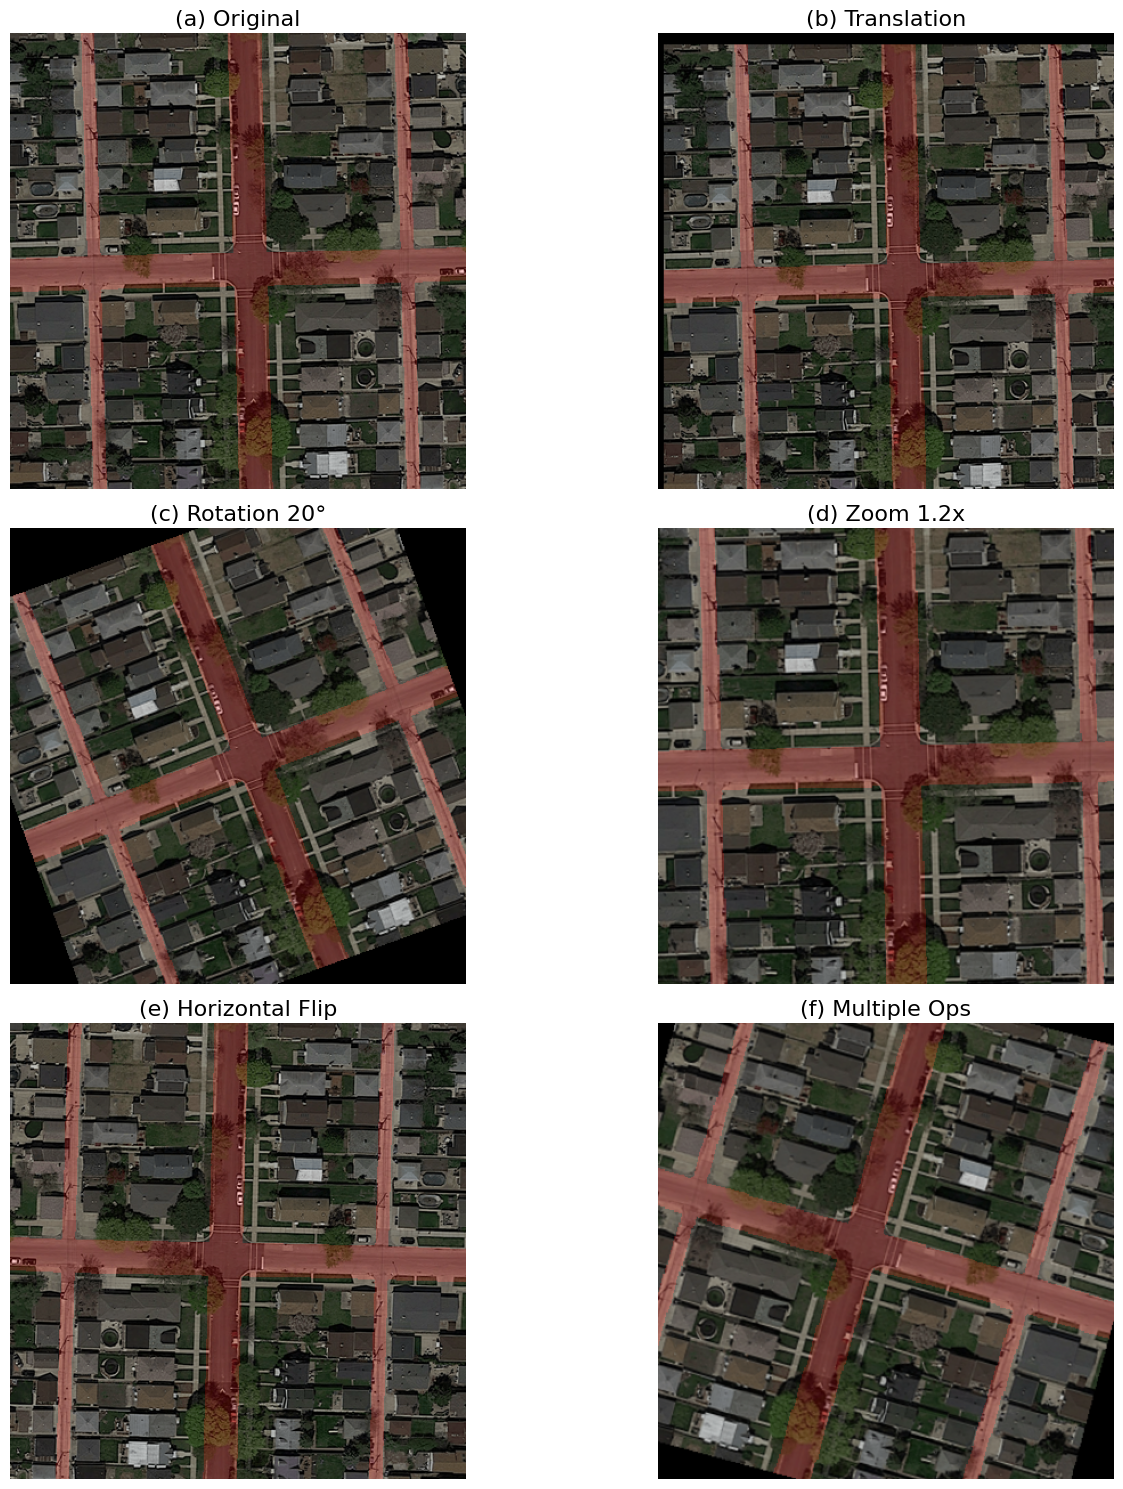

In [14]:
original_img = mpimg.imread('/Users/aurelien/ML/ML_course-main/projects/project2/data/training/basic/images/satImage_001.png')  # shape (H, W, 3)
original_mask = mpimg.imread('/Users/aurelien/ML/ML_course-main/projects/project2/data/training/basic/groundtruth/satImage_001.png')  # shape (H, W)
original_mask = (original_mask > 0.5).astype(np.uint8)  # Convert to binary

show_transformations(original_img, original_mask)